In [17]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [18]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')
sales = pd.read_csv('sales-cars.csv',index_col=0,parse_dates=[0],date_parser=parser)

In [19]:
sales.head(2)

,Sales
Month,
2016-01-01,266
2016-02-01,146


In [12]:
sales.Month[1]

'2016-02'

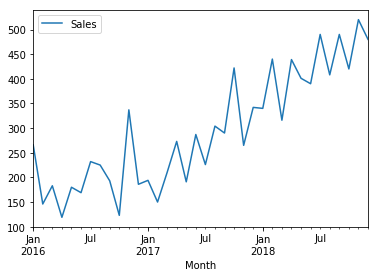

In [20]:
sales.plot()

## Stationarity
stationary --> means mean,variance and covariance is constant over periods of time

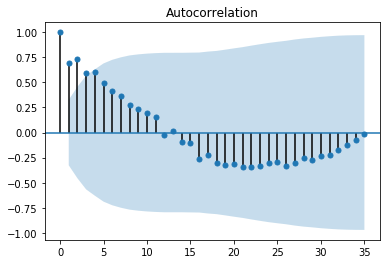

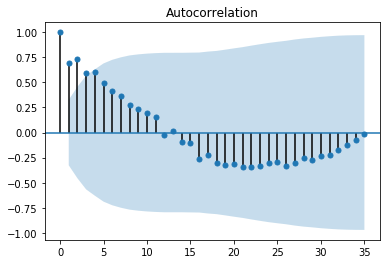

In [110]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)
##shows correlation between two series with the time lag, next series formed by shifting the time

#### converting series to stationary

In [128]:
sales.shift(1)

,Sales
Month,
2016-01-01,NaN
2016-02-01,266.0
2016-03-01,146.0
2016-04-01,183.0
2016-05-01,119.0
2016-06-01,180.0
2016-07-01,169.0
2016-08-01,232.0
2016-09-01,225.0


In [129]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d (for difference) , one of the parameter of ARIMA model

In [131]:
##remove the NaN
sales_diff = sales_diff[1:]

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


In [146]:
sales_diff.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


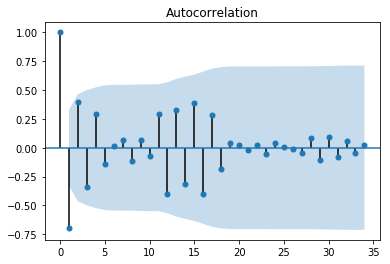

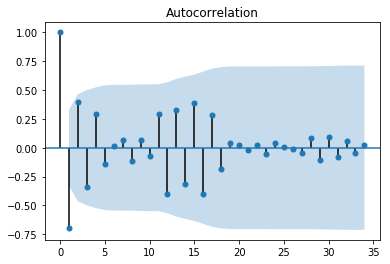

In [147]:
plot_acf(sales_diff)

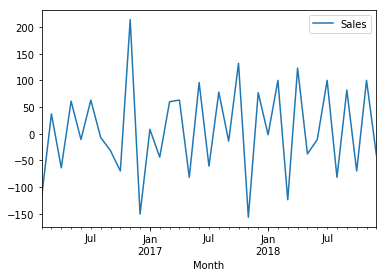

In [148]:
##good stationary as quick decay to enagtive
sales_diff.plot()

In [149]:
##is approx stationary which is good!

In [150]:
##thus we have ensured time factor is the new index. We saw it was not stationary so we took the difference and made it stationary

In [214]:
X = sales.values
train = X[0:27] # 27 data as train data
test = X[28:]  # 9 data as test data
predictions = []

In [215]:
train.size, test.size

(27, 8)

In [216]:
###Autoregressive model

In [217]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [218]:
predictions = model_ar_fit.predict(start=26,end=36)

In [219]:
test

array([[401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

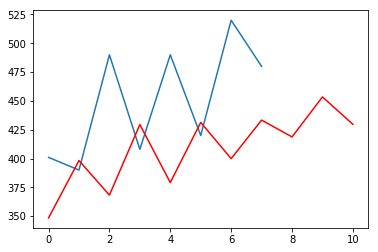

In [220]:
plt.plot(test)
plt.plot(predictions, color='red')

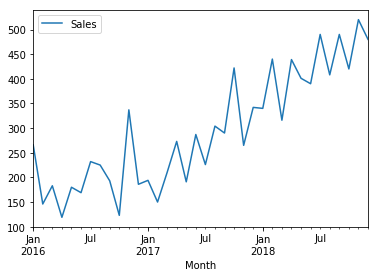

In [221]:
sales.plot()

In [222]:
###ARIMA model

In [223]:
from statsmodels.tsa.arima_model import ARIMA

In [240]:
#p,d,q. 
#p=periods taken for autogressive model, 
#d= integrated order/difference
#q = number of periods in moving average model
model_arima = ARIMA(train,order=(4,2,1))
model_arima_fit = model_arima.fit() 
print(model_arima_fit.aic)

291.3991344717455


In [241]:
predictions = model_arima_fit.forecast(steps=10)[0]
predictions

array([419.86217398, 399.60370707, 480.05786807, 431.16690555,
       488.80130808, 488.07651028, 543.45026224, 535.49526276,
       575.01629797, 586.85550802])

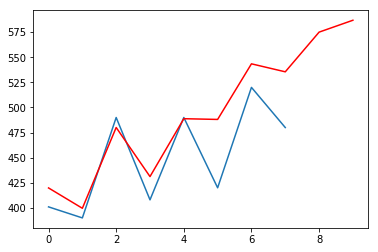

In [242]:
plt.plot(test)
plt.plot(predictions, color='red')

In [243]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [244]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue 

(0, 0, 0) 319.45285852307086
(0, 0, 1) 318.7244809384947
(0, 0, 2) 315.25060028714074
(0, 0, 3) nan
(0, 0, 4) 310.1669328577808
(0, 1, 0) 311.8293983488534
(0, 1, 1) 296.0841530678005
(0, 1, 2) 296.3229226907689
(0, 2, 0) 329.1834958250828
(0, 2, 1) 306.10194864931043
(1, 0, 0) 316.1668717522317
(1, 0, 2) 310.9790642222411
(1, 0, 4) 309.6779931142639
(1, 1, 0) 298.8325442271006
(1, 1, 1) 297.12565112584997
(1, 1, 2) 299.47166670625876
(1, 1, 3) 301.2851180948257
(1, 1, 4) nan
(1, 2, 0) 306.5307767571543
(1, 2, 3) 290.3253394346377
(2, 0, 0) 310.99695736148806
(2, 0, 4) nan
(2, 1, 0) 300.2089561239962
(2, 1, 1) 297.9999930167355
(2, 1, 2) 298.55054281302404
(2, 1, 3) 302.8720815323284
(2, 2, 0) 306.2975856432374
(2, 2, 3) nan
(3, 0, 0) 312.9838587422689
(3, 0, 4) nan
(3, 1, 0) 294.854358421861
(3, 1, 1) 295.9979353418377
(3, 1, 2) 292.6686238693931
(3, 1, 3) 294.65889075164176
(3, 2, 0) 299.40758681563216
(3, 2, 4) 291.2750489692787
(4, 0, 0) 311.07065620339836
(4, 0, 1) 321.42516523342